In [175]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb7fb190c10>

In [176]:
# Example of spectrum

f = fits.open('https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits')  

# The spectrum is in the second HDU of this file.
specdata = f[1].data[1020:1250] 
f.close() 

In [177]:
from specutils import Spectrum1D
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
input_spec = Spectrum1D(spectral_axis=lamb, flux=flux)

print(flux)

[2.2726817e-15 2.2585723e-15 2.2237829e-15 2.1584051e-15 2.1329969e-15
 2.1262731e-15 2.2112750e-15 2.2167418e-15 2.1669832e-15 2.2354540e-15
 2.1875420e-15 2.1826358e-15 2.1558708e-15 2.2159511e-15 2.2189419e-15
 2.1860480e-15 2.1349650e-15 2.2052475e-15 2.1752551e-15 2.1608221e-15
 2.1360473e-15 2.1744642e-15 2.1899139e-15 2.2136268e-15 2.0847639e-15
 2.0912161e-15 2.1315978e-15 2.0861890e-15 2.1406579e-15 2.0602899e-15
 2.0075117e-15 1.9139281e-15 1.8649827e-15 1.7972212e-15 1.8231959e-15
 2.0544026e-15 2.8331766e-15 3.6289979e-15 3.3332726e-15 2.4190931e-15
 1.9519042e-15 1.8722780e-15 1.8765179e-15 1.9681187e-15 1.9818165e-15
 1.8812780e-15 1.9373886e-15 1.8871481e-15 1.9480242e-15 1.9385264e-15
 1.9664950e-15 2.0310802e-15 2.1197595e-15 2.1480353e-15 2.1447584e-15
 2.0876990e-15 2.0878809e-15 2.1375800e-15 2.0902431e-15 2.0091655e-15
 2.0902035e-15 2.0422502e-15 2.0890816e-15 1.9882728e-15 1.9641074e-15
 2.0505374e-15 2.1748841e-15 2.2274610e-15 2.2850620e-15 2.2518356e-15
 2.240

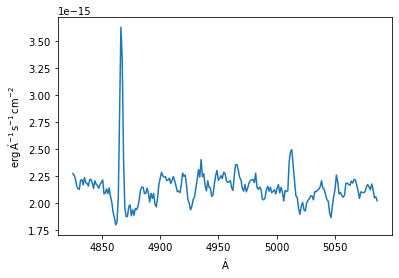

In [178]:
plt.plot(lamb,flux)

In [179]:
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler

new_disp_grid_0_20 = np.arange(4800, 5200, 0.20) * u.AA
new_disp_grid_4_33 = np.arange(4800, 5200, 4.33) * u.AA

print(new_disp_grid_4_33.value)
print(new_disp_grid_4_33.unit)
print(lamb[0],lamb[-1])

[4800.   4804.33 4808.66 4812.99 4817.32 4821.65 4825.98 4830.31 4834.64
 4838.97 4843.3  4847.63 4851.96 4856.29 4860.62 4864.95 4869.28 4873.61
 4877.94 4882.27 4886.6  4890.93 4895.26 4899.59 4903.92 4908.25 4912.58
 4916.91 4921.24 4925.57 4929.9  4934.23 4938.56 4942.89 4947.22 4951.55
 4955.88 4960.21 4964.54 4968.87 4973.2  4977.53 4981.86 4986.19 4990.52
 4994.85 4999.18 5003.51 5007.84 5012.17 5016.5  5020.83 5025.16 5029.49
 5033.82 5038.15 5042.48 5046.81 5051.14 5055.47 5059.8  5064.13 5068.46
 5072.79 5077.12 5081.45 5085.78 5090.11 5094.44 5098.77 5103.1  5107.43
 5111.76 5116.09 5120.42 5124.75 5129.08 5133.41 5137.74 5142.07 5146.4
 5150.73 5155.06 5159.39 5163.72 5168.05 5172.38 5176.71 5181.04 5185.37
 5189.7  5194.03 5198.36]
Angstrom
4825.0302734375 Angstrom 5086.27587890625 Angstrom


/home/jean/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


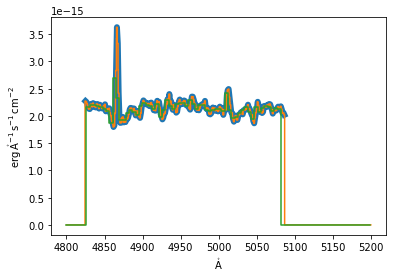

In [180]:
# Flux Conserving Resampler:

fluxcon = FluxConservingResampler()
new_spec_fluxcon_0_20 = fluxcon(input_spec, new_disp_grid_0_20) 
new_spec_fluxcon_4_33 = fluxcon(input_spec, new_disp_grid_4_33) 

fill_val = 0.0
new_spec_fluxcon_0_20.flux_corr = np.where( np.isnan(new_spec_fluxcon_0_20.flux.value) , 0.0 * new_spec_fluxcon_0_20.flux.unit , new_spec_fluxcon_0_20.flux )
new_spec_fluxcon_4_33.flux_corr = np.where( np.isnan(new_spec_fluxcon_4_33.flux.value) , 0.0 * new_spec_fluxcon_4_33.flux.unit , new_spec_fluxcon_4_33.flux )

#print(fluxcon.__doc__)

# Plot result
f, ax = plt.subplots()  

ax.plot( lamb,flux,linewidth=6 )
ax.step( new_spec_fluxcon_0_20.spectral_axis, new_spec_fluxcon_0_20.flux_corr )
ax.step( new_spec_fluxcon_4_33.spectral_axis, new_spec_fluxcon_4_33.flux_corr )

In [181]:
new_spec_fluxcon_4_33.flux_corr.value

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16017771e-15,
       2.20050065e-15, 2.19343083e-15, 2.17570340e-15, 2.16400213e-15,
       2.13425188e-15, 2.08833011e-15, 1.87543119e-15, 2.69628813e-15,
       2.33108151e-15, 1.92870803e-15, 1.92644701e-15, 2.05188976e-15,
       2.11451597e-15, 2.07119704e-15, 2.02040678e-15, 2.19096186e-15,
       2.23689913e-15, 2.20811349e-15, 2.18995474e-15, 2.13597205e-15,
       2.22428177e-15, 1.98250629e-15, 2.10236096e-15, 2.29964224e-15,
       2.19028907e-15, 2.12699406e-15, 2.21036144e-15, 2.22997825e-15,
       2.24471340e-15, 2.17548846e-15, 2.28864708e-15, 2.21961440e-15,
       2.13035910e-15, 2.20003424e-15, 2.19915791e-15, 2.10618739e-15,
       2.08622128e-15, 2.11722120e-15, 2.11923379e-15, 2.11940509e-15,
       2.09076250e-15, 2.42121753e-15, 2.11413403e-15, 1.95499175e-15,
       1.97156444e-15, 2.05161222e-15, 2.10248140e-15, 2.15708928e-15,
      


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



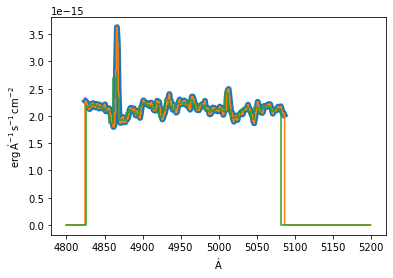

In [182]:
import spectres

fill_val = 0.0
#print(spectres.spectral_resampling.spectres.__doc__)

model_resampled_0_20 = spectres.spectral_resampling_numba.spectres_numba( new_disp_grid_0_20.value, lamb.value, flux.value, fill=fill_val)
model_resampled_4_33 = spectres.spectral_resampling_numba.spectres_numba( new_disp_grid_4_33.value, lamb.value, flux.value, fill=fill_val)

plt.plot( lamb,flux,linewidth=6 )
plt.step( new_disp_grid_0_20,model_resampled_0_20 )
plt.step( new_disp_grid_4_33,model_resampled_4_33 )

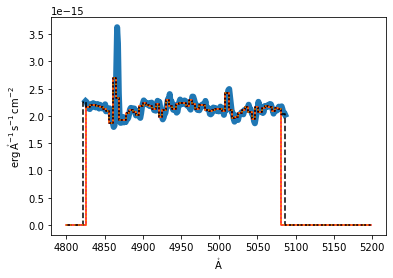

In [183]:
import FluxConSpec as fcon
#print(fcon.fluxconspec.__doc__)

fill_val  = 0.0
verbosity = 0
per_bins  = 1
slow_int  = 0
orfluxes_0_20,iskeepon = fcon.fluxconspec(new_disp_grid_0_20,lamb,flux,per_bins,slow_int,fill_val=fill_val,verbosity=verbosity)
orfluxes_4_33,iskeepon = fcon.fluxconspec(new_disp_grid_4_33,lamb,flux,per_bins,slow_int,fill_val=fill_val,verbosity=verbosity)

plt.plot( lamb,flux,linewidth=6 )
#plt.step( new_disp_grid_0_20,model_resampled_0_20 )
plt.step( new_disp_grid_4_33,model_resampled_4_33,color='red' )
#plt.step( new_disp_grid_0_20,orfluxes_0_20 )
plt.step( new_disp_grid_4_33,orfluxes_4_33,color='black',linestyle='--' )

plt.step( new_spec_fluxcon_4_33.spectral_axis, new_spec_fluxcon_4_33.flux_corr,color='darkorange',linestyle='dotted' )

In [184]:
# Verify total area

A_original = np.trapz( flux, x=lamb )
print(lamb[0].value,lamb[-1].value,A_original)

A_fortran = np.trapz( orfluxes_4_33 * u.Unit('erg cm-2 s-1 AA-1') , x=new_disp_grid_4_33 )
print(new_disp_grid_4_33[0].value,new_disp_grid_4_33[-1].value,A_fortran)

A_model_resampled = np.trapz( model_resampled_4_33 * u.Unit('erg cm-2 s-1 AA-1') , x=new_disp_grid_4_33 )
print(A_model_resampled)

4825.0303 5086.276 5.599246110168932e-13 erg / (cm2 s)
4800.0 5198.359999999993 5.660601700229092e-13 erg / (cm2 s)
5.475095326324436e-13 erg / (cm2 s)


In [185]:
import sys
sys.path.insert(1, '/home/jean/Pynoptic/IntegralAll/')
import IntegralALL as integral

In [190]:
# integralall,iskeepon = integral.integralall( x,y,lambda_i,lambda_f,int_type=int_type,verbosity=0 )
lambda_i = lamb[0].value
lambda_f = lamb[-1].value
A_original,iskeepon = integral.integralall( lamb,flux,lambda_i,lambda_f )

In [191]:
A_original

5.599246244487037e-13

In [192]:
A_fortran,iskeepon = integral.integralall( new_disp_grid_4_33,orfluxes_4_33,lambda_i,lambda_f )

In [193]:
A_fortran

5.596373526982488e-13

In [194]:
A_model_resampled,iskeepon = integral.integralall( new_disp_grid_4_33,model_resampled_4_33,lambda_i,lambda_f )

In [195]:
A_model_resampled

5.475095326324437e-13

In [199]:
lambda_i = 4850.
lambda_f = 5050.
A_original,iskeepon = integral.integralall( lamb,flux,lambda_i,lambda_f )
A_original

4.279395497980336e-13

In [197]:
A_fortran,iskeepon = integral.integralall( new_disp_grid_4_33,orfluxes_4_33,lambda_i,lambda_f )
A_fortran

4.280804376906603e-13

In [198]:
A_model_resampled,iskeepon = integral.integralall( new_disp_grid_4_33,model_resampled_4_33,lambda_i,lambda_f )
A_model_resampled

4.280806080595877e-13

In [203]:
print(A_original/A_fortran, A_original/A_model_resampled)

0.9996708845342555 0.9996704866819511


In [204]:
lambda_i = 4859.
lambda_f = 5048.3
A_original,iskeepon = integral.integralall( lamb,flux,lambda_i,lambda_f )
A_original

4.0550575787352954e-13

In [205]:
A_fortran,iskeepon = integral.integralall( new_disp_grid_4_33,orfluxes_4_33,lambda_i,lambda_f )
A_fortran

4.0575497950366705e-13

In [206]:
A_model_resampled,iskeepon = integral.integralall( new_disp_grid_4_33,model_resampled_4_33,lambda_i,lambda_f )
A_model_resampled

4.05755142522646e-13